In [6]:
import mediapipe as mp
import cv2
import numpy as np
import uuid 
import os 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from hmmlearn import hmm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

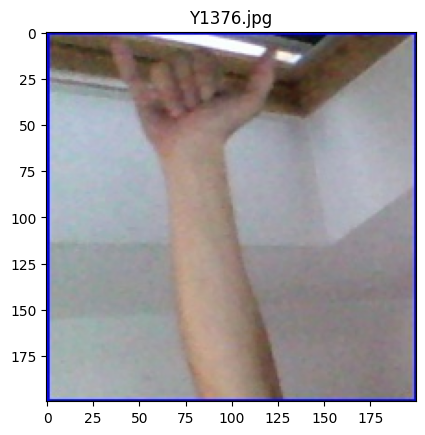

In [10]:
dataset_path = 'dataset'  # Make sure your dataset is inside the dataset folder

# Initialize lists to store images and labels
images = []

# Load and process each image
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):  # Ensure that label_path is a directory
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append((image, label, image_name))

# Display a sample image
plt.imshow(images[0][0])
plt.title(images[0][2])
plt.show()

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands 

In [17]:
# Open the webcam
cap = cv2.VideoCapture(0)

# Create a MediaPipe hands object with context manager (fixed argument order)
with mp_hands.Hands(
    min_detection_confidence=0.8,
    min_tracking_confidence=0.5,
    max_num_hands=4
) as hands:
  while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = cv2.flip(image, 1) 

    # Set image writable flag to False before processing
    image.flags.writeable = False

    # Detect hands in the frame
    results = hands.process(image)

    # Set image writable flag back to True
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Print results (for debugging purposes)
    print(results)

    if results.multi_hand_landmarks:
      for num, hand in enumerate(results.multi_hand_landmarks):
        mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),)

    # Display the resulting frame
    cv2.imshow('Hand Tracking', image)

    # Quit if 'q' key is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break

# Release the capture
cap.release()

# Close all windows
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [12]:
mp_hands.HAND_CONNECTIONS 

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})